In [33]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
def display(img,cmap = "gray"):
    plt.figure(figsize = (20,16))
    plt.imshow(img,cmap = "gray")


In [35]:
reeses = cv2.imread("reeses_puffs.png",0)

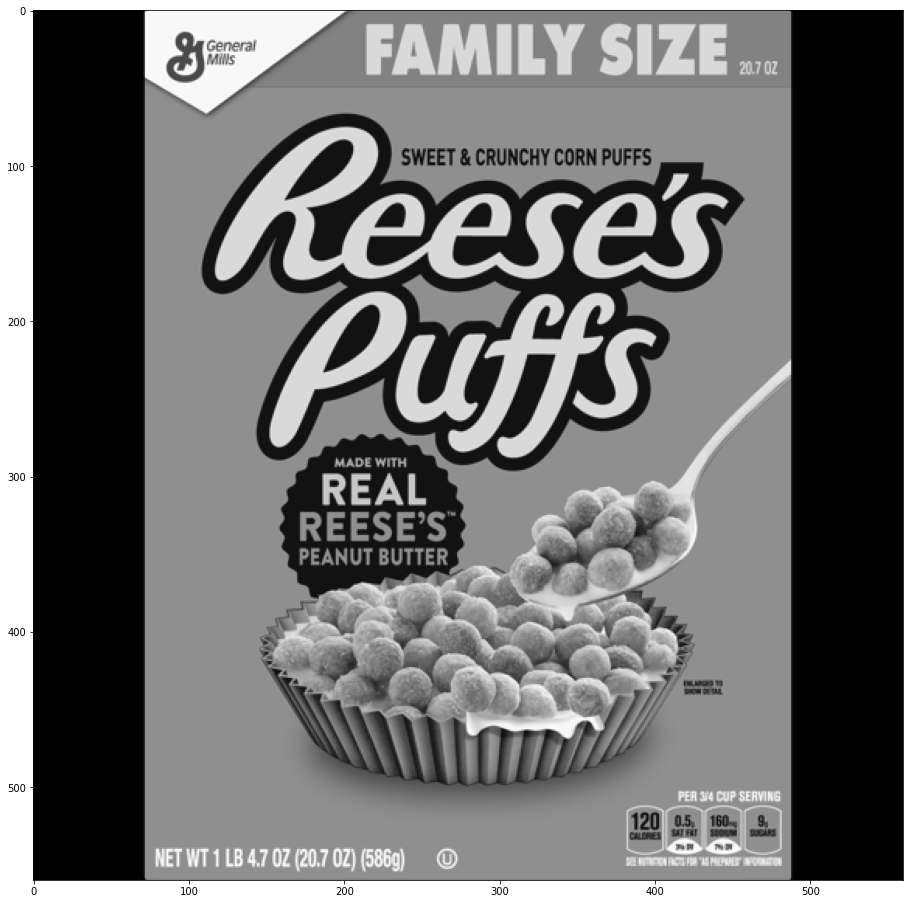

In [36]:
display(reeses)

In [37]:
cereals = cv2.imread("many_cereals.jpg",0)

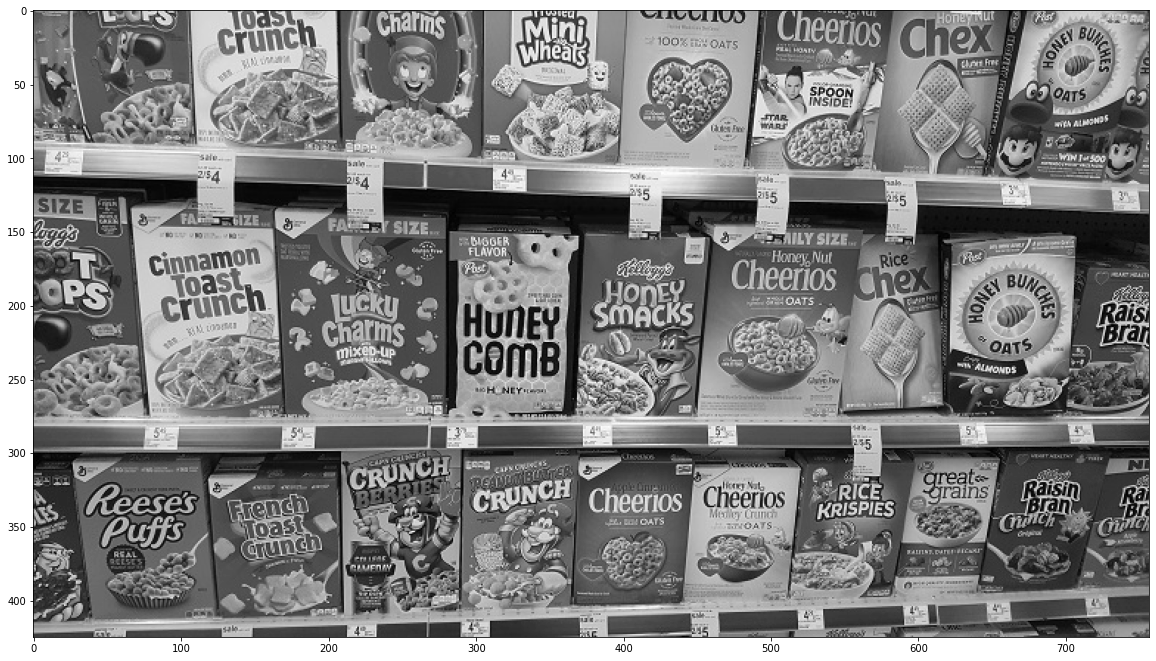

In [38]:
display(cereals)

<h1> Orb Brute Force Method<h1>

In [39]:
orb = cv2.ORB_create()

In [40]:
keypoints1,descripotrs1 = orb.detectAndCompute(reeses,None)
keypoints2,descripotrs2 = orb.detectAndCompute(cereals,None)

In [41]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)
# default Parameters

In [42]:
matches = bf.match(descripotrs1,descripotrs2)

In [43]:
matches = sorted(matches,key = lambda x: x.distance)

In [44]:
matches

[<DMatch 000002323DCAA750>,
 <DMatch 000002323DCAAFD0>,
 <DMatch 000002323DCAA650>,
 <DMatch 000002323DB7C0D0>,
 <DMatch 000002323DB7C530>,
 <DMatch 000002323DB7C710>,
 <DMatch 000002323DB7C4D0>,
 <DMatch 000002323DB7C1D0>,
 <DMatch 000002323DB7C1F0>,
 <DMatch 000002323DCAAE50>,
 <DMatch 000002323DB7C450>,
 <DMatch 000002323DB7C590>,
 <DMatch 000002323D030530>,
 <DMatch 000002323DCAAA90>,
 <DMatch 000002323DCAA710>,
 <DMatch 000002323DCAAEB0>,
 <DMatch 000002323DB7C2D0>,
 <DMatch 000002323D0300B0>,
 <DMatch 000002323DCAAAB0>,
 <DMatch 000002323DB7C230>,
 <DMatch 000002323DC4D7D0>,
 <DMatch 000002323DB7C4B0>,
 <DMatch 000002323DB7C510>,
 <DMatch 000002323DB7C6B0>,
 <DMatch 000002323DB7C830>,
 <DMatch 000002323DCAAA10>,
 <DMatch 000002323DB7C0B0>,
 <DMatch 000002323DB7C0F0>,
 <DMatch 000002323DB7C290>,
 <DMatch 000002323DCAAAF0>,
 <DMatch 000002323DCAAB10>,
 <DMatch 000002323DB7C350>,
 <DMatch 000002323DB7C370>,
 <DMatch 000002323DCAA9F0>,
 <DMatch 000002323DB7C630>,
 <DMatch 000002323DB

In [45]:
reeses_matches = cv2.drawMatches(reeses,keypoints1,cereals,keypoints2,matches[:25],None,flags = 2)

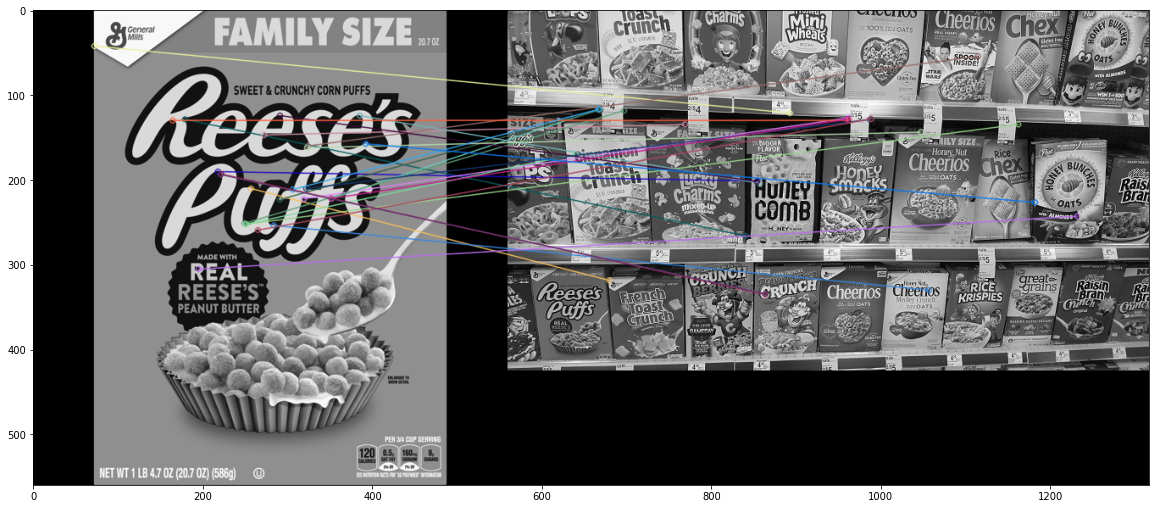

In [46]:
display(reeses_matches)

<h1>SIFT METHOD<h1>

In [47]:
sift = cv2.SIFT_create()

In [48]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [49]:
bf = cv2.BFMatcher()

In [50]:
matches = bf.knnMatch(des1,des2,k = 2)
# It resturns k best matches

In [51]:
matches

((<DMatch 000002323DCD3B10>, <DMatch 000002323DCD3E50>),
 (<DMatch 000002323DCD3EF0>, <DMatch 000002323DCD3710>),
 (<DMatch 000002323DCD3C70>, <DMatch 000002323DCD30B0>),
 (<DMatch 000002323DCD3D10>, <DMatch 000002323DCD3150>),
 (<DMatch 000002323DCD33F0>, <DMatch 000002323DCD3330>),
 (<DMatch 000002323DCD3290>, <DMatch 000002323DCD3E10>),
 (<DMatch 000002323DCD30F0>, <DMatch 000002323DCD3F90>),
 (<DMatch 000002323DCD3FB0>, <DMatch 000002323DCD3F50>),
 (<DMatch 000002323DCD3F70>, <DMatch 000002323DCD3990>),
 (<DMatch 000002323DCD3950>, <DMatch 000002323DCD3910>),
 (<DMatch 000002323DCD3930>, <DMatch 000002323DCD3DD0>),
 (<DMatch 000002323DCD3DF0>, <DMatch 000002323DCD3D90>),
 (<DMatch 000002323DCD3DB0>, <DMatch 000002323DCD3050>),
 (<DMatch 000002323DCD3070>, <DMatch 000002323DCD3970>),
 (<DMatch 000002323DCD39B0>, <DMatch 000002323DCD3A50>),
 (<DMatch 000002323DCD3A70>, <DMatch 000002323DCD3A10>),
 (<DMatch 000002323DCD3A30>, <DMatch 000002323DCD3190>),
 (<DMatch 000002323DCD3170>, <D

In [52]:
# The matches should be relatively close to each other in distance
# Ratio Test
good = []
for match1,match2 in matches:
    if match1.distance<0.75*match2.distance:
        good.append([match1])

In [53]:
len(good)

79

In [55]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags = 2)

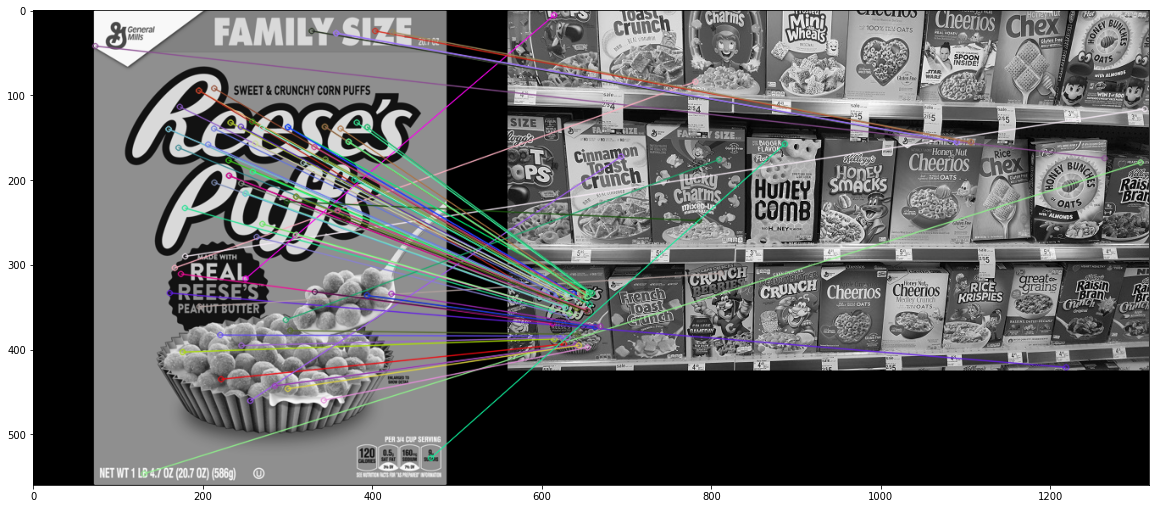

In [56]:
display(sift_matches)

FLANN METHOD


<p>Much faster than brute force but not as efficient
Efficiency can be increased at the cost of speed of the algo<p>

In [58]:
flann_index_kdtree = 0
index_params = dict(algorithm = flann_index_kdtree,trees= 5)
search_params = dict(checks = 50)

In [59]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [73]:
matches = flann.knnMatch(des1,des2,k = 2)

In [74]:
matchesMask = [[0,0] for i in range(len(matches))]

In [75]:
# good = []
# for match1,match2 in matches:
#     if match1.distance<0.75*match2.distance:
#         good.append([match1])
for i,(match1,match2) in enumerate(matches):
    if match1.distance<0.75*match2.distance:
        matchesMask[i] = [1,0]

In [76]:
draw_params = dict(matchColor = (0,255,0),singlePointColor = (255,0,0),matchesMask = matchesMask,flags = 0)

In [62]:
# len(good)

79

In [78]:
# flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags = 0)
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

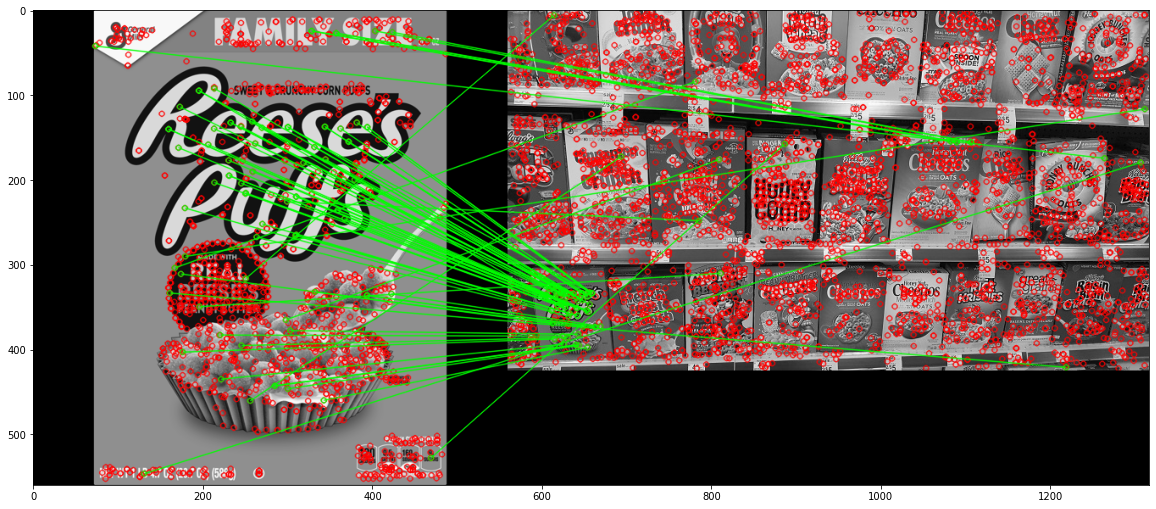

In [79]:
display(flann_matches)